In [19]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R

# Custom libraries
from PyDUST.WriteFile import  generate_reference, save_to_file, generate_dust, generate_dust_post
from PyDUST.ReadDat import read_dat, extract_n_column_from_file


### Set-up the windplane attitute and wind condition

In [20]:
## Apparent wind speed
u_x = - 50. # [m/s]
u_y = 0     # [m/s]
u_z = 0     # [m/s]
AoA =  11   # Angle of attack
beta_t = -11  # Pitch angle of the onboard turbines with respect to the wing 

r = R.from_euler('y', 180+AoA, degrees=True)
RAoA = r.as_matrix()
R_11 = RAoA[0,0]
R_13 = RAoA[2,0]
R_31 = RAoA[0,2]

r = R.from_euler('y', 180+beta_t, degrees=True)
Rt = r.as_matrix()
Rt_11 = Rt[0,0]
Rt_13 = Rt[2,0]
Rt_31 = Rt[0,2]

R_t = 1.      # [m] Turbines radius
R_t0 = 0.2    # [m] Turbines hub radius
N_blades = 3 # Number of blades in the rotor
lambda_t = 1.91 # Turbines tip-speed ratio
Omega_t = -u_x * np.cos((AoA+beta_t)*np.pi/180) * lambda_t /(R_t)  # [rad/s] Angular velocity of the rotors

Ddeg = 5 # Degrees for the time step
dt = Ddeg /( Omega_t * 180/np.pi) # [s] Time step
n_rot = 8  # Number of rotor revolution in the simulation
tend = dt * (360/5)*n_rot  # [s] Final time


In [21]:
# Path to the dust binary files
path_to_dust = '../../dust-develop/build/bin/'
path_to_sim  = './'

# Create the reference input file for the simulation
file_path = "references.in"
content = generate_reference(Omega_t, N_blades, R_t0,R_11,R_13,R_31,Rt_11,Rt_13,Rt_31)  # Generate the content for the reference file
save_to_file(content, file_path)  # Save the content to the reference input file

# Create the dust input file with the specified free-stream velocity
file_path = "dust.in"
content = generate_dust(u_x,u_y,u_z,dt,tend,dt)  # Generate the content for the dust input file
save_to_file(content, file_path)  # Save the content to the dust input file

# Create the dust postprocess file with correct number of timesteps
file_path = "dust_post.in"
content = generate_dust_post(round(n_rot*360/Ddeg))
save_to_file(content, file_path)

os.system(path_to_dust + 'dust_pre ' + path_to_sim + 'dust_pre.in')  # Pre-processing step


File 'references.in' has been created.
File 'dust.in' has been created.
File 'dust_post.in' has been created.

>>>>>> DUST PREPROCESSOR beginning >>>>>>

Reading input parameters from file "./dust_pre.in"


Reading input parameters from file "blade_left.in"

Reading input parameters from file "blade_left.in"
 
  Number of sections:           41
  Number of regions:            40

Reading input parameters from file "blade_right.in"

Reading input parameters from file "blade_right.in"
 
  Number of sections:           41
  Number of regions:            40

Reading input parameters from file "wing.in"

Reading input parameters from file "wing.in"

<<<<<< DUST PREPROCESSOR end       <<<<<<



0

### Launch DUST simulation

In [4]:
os.system(path_to_dust + 'dust ' + path_to_sim + 'dust.in')  # Main dust solver


>>>>>> DUST beginning >>>>>>


Reading input parameters from file "./dust.in"


====== Input parameters: ======

Reading input parameters from file "./dust.in"

====== Geometry Creation ======

Reading input parameters from file "references.in"
Reading geometry from file "geo_input.h5"
Created geometry in:     0.034 s.

====== Initializing Octree ======



WARNING in "initialize_octree", in module "mod_octree"!
  Particles box bigger than octree box, particles box resized to the octree box



Initialized octree in:     0.563 s.

====== Initializing Wake ======

====== Initializing Linear System ======
Initialized linear system in:     2.763 s.

------ Completed all preliminary operations in:     3.510 s.

////////// Performing Computations //////////

--> Step     1 of    81 simulation time:    0.0000
Elapsed wall time:     3.512
Assembled linear system in:     0.074 s.
Solved linear system in:     0.006 s.
Updated wake in:     0.024 s.
Updated geometry in:     0.008 s.

--> Step     2 of    81 simulation time:    0.0012
Elapsed wall time:     4.625
Assembled linear system in:     0.087 s.
Solved linear system in:     0.005 s.
Updated wake in:     0.024 s.
Updated geometry in:     0.010 s.

--> Step     3 of    81 simulation time:    0.0024
Elapsed wall time:     5.664
Assembled linear system in:     0.071 s.
Solved linear system in:     0.004 s.
Updated wake in:     0.030 s.
Updated geometry in:     0.017 s.

--> Step     4 of    81 simulation time:    0.0036
Elapsed wall 

0

### Launch post-processor

In [5]:
os.system(path_to_dust + 'dust_post ' + path_to_sim + 'dust_post.in')  # Post-processing step


>>>>>> DUST POSTPROCESSOR beginning >>>>>>


Reading input parameters from file "./dust_post.in"


++++++++++ Analysis: 1 visualization


++++++++++ Visualization done


++++++++++ Analysis: 2 sectional loads

   Analysing component : Wing

   Employing the local reference frame for moment and force projection.
   Reference tag: Wing  (ID: 2)

++++++++++ Sectional loads done


++++++++++ Analysis: 3 integral loads

  Analysing the following components:
   1) Wing



WARNING in "post_sectional", in module "mod_post_sectional"!
  Cannot output corrected vortex lattice data for a non vortex lattice component, output of vortex lattice data skipped




++++++++++ Integral loads done


++++++++++ Analysis: 4 sectional loads

   Analysing component : Rotorl__01

   Employing the local reference frame for moment and force projection.
   Reference tag: Hub_l__01  (ID: 4)

++++++++++ Sectional loads done


++++++++++ Analysis: 5 integral loads

  Analysing the following components:
   1) Rotorl

++++++++++ Integral loads done


++++++++++ Analysis: 6 sectional loads

   Analysing component : Rotorr__01

   Employing the local reference frame for moment and force projection.
   Reference tag: Hub_r__01  (ID: 8)

++++++++++ Sectional loads done


++++++++++ Analysis: 7 integral loads

  Analysing the following components:
   1) Rotorr

++++++++++ Integral loads done


<<<<<< DUST POSTPROCESSOR end       <<<<<<



0

# POST PROCESSING

### Indices for taking mean values

In [6]:
in_v = round(n_rot*360/Ddeg - 360/Ddeg)
end_v = round(n_rot*360/Ddeg)
print(in_v, end_v)

7 79


### Integral turbines performances

In [7]:
Fx_int_rot = extract_n_column_from_file('./postpro/test_int_rot_right.dat',2)  # Extract second column from test_int.dat

T_rot_tot = np.mean(Fx_int_rot[in_v:end_v], axis=0)
CT_int = -T_rot_tot/(1/2*1.225*np.pi*R_t**2*u_x**2)
print("T_rot_tot= ",2*T_rot_tot)
print("CT_rot = ",CT_int)

T_rot_tot=  -2522.2510801081285
CT_rot =  0.15512280241249343


In [8]:
Mx_int = extract_n_column_from_file('./postpro/test_int_rot_right.dat',5)  # Extract second column from test_int.dat
Mx_int_rot = np.mean(Mx_int[in_v:end_v])
print("Mx = ",Mx_int_rot)
P_rot = (-Mx_int_rot*Omega_t)
CP_int = P_rot/(1/2*1.225*np.pi*R_t**2*np.abs(u_x)**3)
print("P = ", 2*P_rot/1e3,"kW")
print("CP_int = ",CP_int)
print("eta = ",CP_int/CT_int)

Mx =  -751.5202986600475
P =  109.8375821118531 kW
CP_int =  0.1351040241931234
eta =  0.8709488359671502


### Integral wing perforcances

In [9]:
Fx_wing_t = extract_n_column_from_file('./postpro/test_int_wing.dat',2) # Extract second column from test_int.dat
Fx_wing = np.mean(Fx_wing_t[in_v:end_v])

Fz_wing_t = extract_n_column_from_file('./postpro/test_int_wing.dat',4)  # Extract second column from test_int.dat
Fz_wing = np.mean(Fz_wing_t[in_v:end_v])

L = -Fz_wing
Di = -Fx_wing

A = (2.43+1.48)*5

CL = L/(1/2*1.225*A*u_x**2)
CDi = Di/(1/2*1.225*A*u_x**2)

print("L = ",L)
print("CL = ",CL)

print("Di = ",Di)
print("CDi = ",CDi)


L =  29664.383952536286
CL =  0.9909288443876623
Di =  2771.538525438529
CDi =  0.09258231934238


### Sectional wing loads

In [16]:
y_cen, y_span, chord, time, Fx        = read_dat('./postpro/test_sec_wing_Fx.dat')
y_cen, y_span, chord, time, Fz        = read_dat('./postpro/test_sec_wing_Fz.dat')

mean_Fz = np.mean(Fz[in_v:end_v,0:len(y_cen.T)], axis=0)
mean_Fx = np.mean(Fx[in_v:end_v,0:len(y_cen.T)], axis=0)

lift = mean_Fz*np.cos(AoA*np.pi/180) - mean_Fx*np.sin(AoA*np.pi/180)
drag = mean_Fx*np.cos(AoA*np.pi/180) + mean_Fz*np.sin(AoA*np.pi/180)

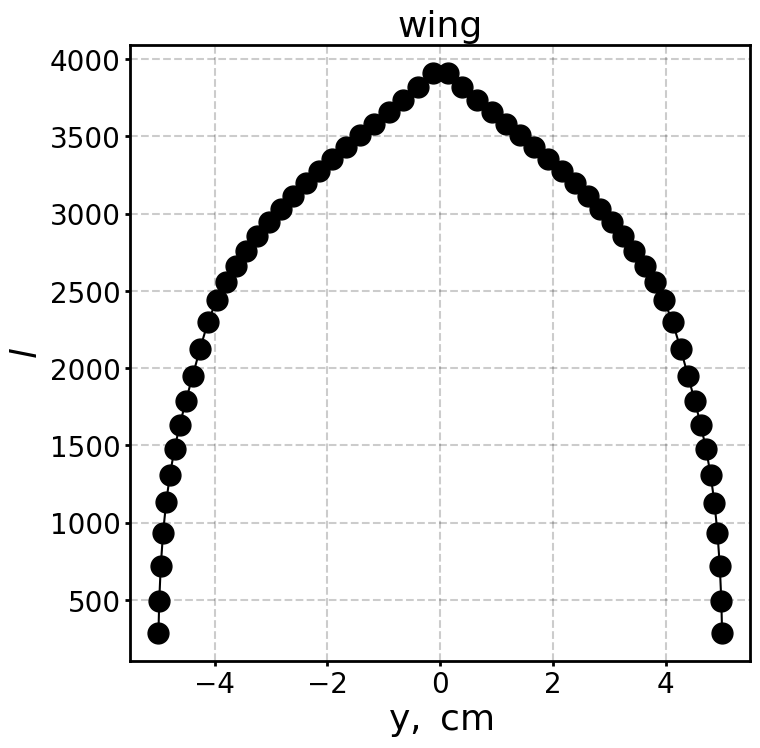

In [17]:
fig = plt.figure(1, (8, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(y_cen.T,lift, linestyle='-', marker='o', color='black', markersize=15)

# Add labels with LaTeX formatting and appropriate fontsize
plt.title(r'wing', fontsize=26)
plt.xlabel(r'$\mathrm{y,\ cm}$', fontsize=26)
plt.ylabel(r'$l$', fontsize=26)
#plt.ylim((1, 1.2))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)            
ax.xaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)
           
# Show grid with specified settings
plt.grid(color='black', linestyle='dashed', linewidth=1.5, alpha=0.2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(width=2)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

# Customize tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()



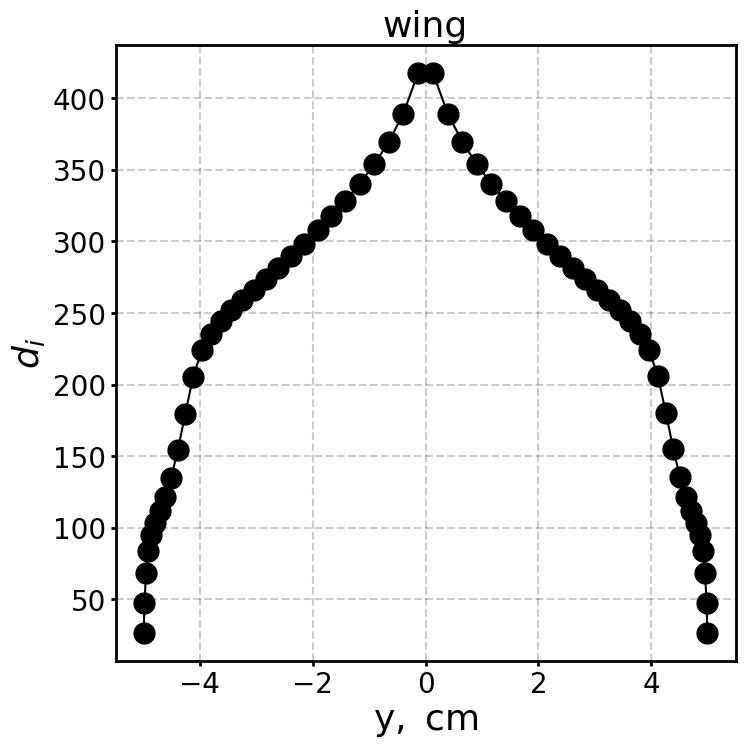

In [18]:

fig = plt.figure(1, (8, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(y_cen.T, drag, linestyle='-', marker='o', color='black', markersize=15)
#plt.plot(y_cen.T, mean_Fx , linestyle='--', marker='x', color='red', markersize=15)

# Add labels with LaTeX formatting and appropriate fontsize
plt.title(r'wing', fontsize=26)
plt.xlabel(r'$\mathrm{y,\ cm}$', fontsize=26)
plt.ylabel(r'$d_i$', fontsize=26)
#plt.ylim((4, 8))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)            
ax.xaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)
           
# Show grid with specified settings
plt.grid(color='black', linestyle='dashed', linewidth=1.5, alpha=0.2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(width=2)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

# Customize tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()

### Sectional turbines loads

In [13]:
# Extract the interst values
y_cen, y_span, chord, time, alpha     = read_dat('./postpro/test_sec_rot_right_alpha.dat')
y_cen, y_span, chord, time, cl_values = read_dat('./postpro/test_sec_rot_right_Cl.dat')
y_cen, y_span, chord, time, up_x      = read_dat('./postpro/test_sec_rot_right_up_x.dat')
y_cen, y_span, chord, time, up_z      = read_dat('./postpro/test_sec_rot_right_up_z.dat')
y_cen, y_span, chord, time, Fy        = read_dat('./postpro/test_sec_rot_right_Fy.dat')
y_cen, y_span, chord, time, Mo        = read_dat('./postpro/test_sec_rot_right_Fy.dat')


mean_up_x = np.mean(up_x[in_v:end_v,:], axis=0)
mean_up_x = np.mean(up_z[in_v:end_v,:], axis=0)
mean_cl = np.mean(cl_values[in_v:end_v,:], axis=0)
mean_alpha = np.mean(alpha[in_v:end_v,:], axis=0)


# Extract the interst values
L_y_cen, y_span, chord, time, alpha     = read_dat('./postpro/test_sec_rot_left_alpha.dat')
L_y_cen, y_span, chord, time, cl_values = read_dat('./postpro/test_sec_rot_left_Cl.dat')
L_y_cen, y_span, chord, time, up_x      = read_dat('./postpro/test_sec_rot_left_up_x.dat')
L_y_cen, y_span, chord, time, up_z      = read_dat('./postpro/test_sec_rot_left_up_z.dat')
L_y_cen, y_span, chord, time, Fy        = read_dat('./postpro/test_sec_rot_left_Fy.dat')
L_y_cen, y_span, chord, time, Mo        = read_dat('./postpro/test_sec_rot_left_Fy.dat')


L_mean_up_x = np.mean(up_x[in_v:end_v,:], axis=0)
L_mean_up_x = np.mean(up_z[in_v:end_v,:], axis=0)
L_mean_cl = np.mean(cl_values[in_v:end_v,:], axis=0)
L_mean_alpha = np.mean(alpha[in_v:end_v,:], axis=0)

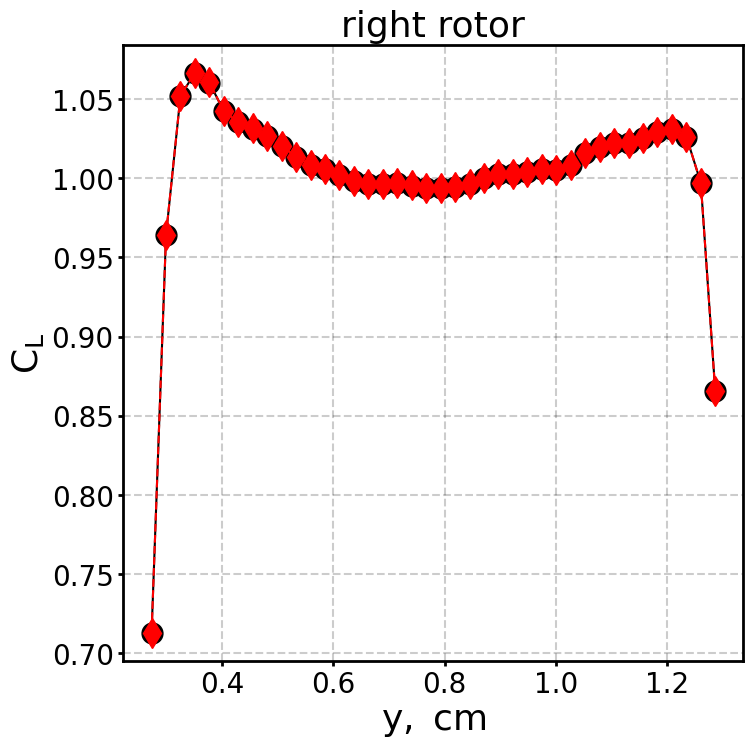

In [14]:
fig = plt.figure(1, (8, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(R_t0+y_cen.reshape(len(mean_up_x)), mean_cl, linestyle='-', marker='o', color='black', markersize=15)
plt.plot(R_t0+L_y_cen.reshape(len(mean_up_x)), L_mean_cl, linestyle='--', marker='d', color='red', markersize=15)

# Add labels with LaTeX formatting and appropriate fontsize
plt.title(r'right rotor', fontsize=26)
plt.xlabel(r'$\mathrm{y,\ cm}$', fontsize=26)
plt.ylabel(r'$\mathrm{C_L}$', fontsize=26)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)            
ax.xaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)
           
#plt.legend('right','left')
# Show grid with specified settings
plt.grid(color='black', linestyle='dashed', linewidth=1.5, alpha=0.2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(width=2)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

# Customize tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()


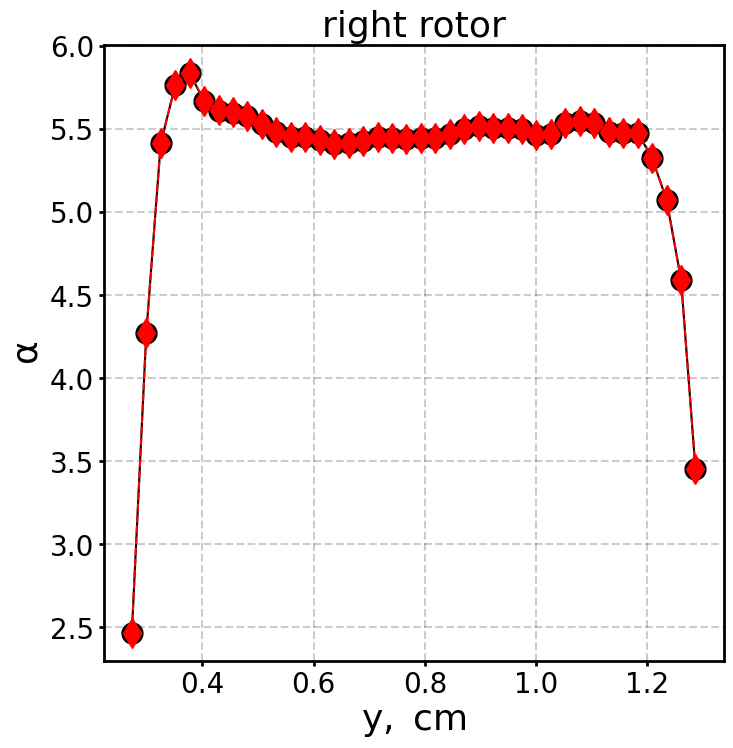

In [15]:
fig = plt.figure(1, (8, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(R_t0+y_cen.reshape(len(mean_up_x)), mean_alpha, linestyle='-', marker='o', color='black', markersize=15)
plt.plot(R_t0+L_y_cen.reshape(len(mean_up_x)), L_mean_alpha, linestyle='--', marker='d', color='red', markersize=15)

# Add labels with LaTeX formatting and appropriate fontsize
plt.title(r'right rotor', fontsize=26)
plt.xlabel(r'$\mathrm{y,\ cm}$', fontsize=26)
plt.ylabel(r'$\mathrm{\alpha}$', fontsize=26)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)            
ax.xaxis.grid(color='gray', linestyle='dashed', linewidth=1.5, alpha=0.8)
           
# Show grid with specified settings
plt.grid(color='black', linestyle='dashed', linewidth=1.5, alpha=0.2)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(width=2)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)

# Customize tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Display the plot
plt.show()